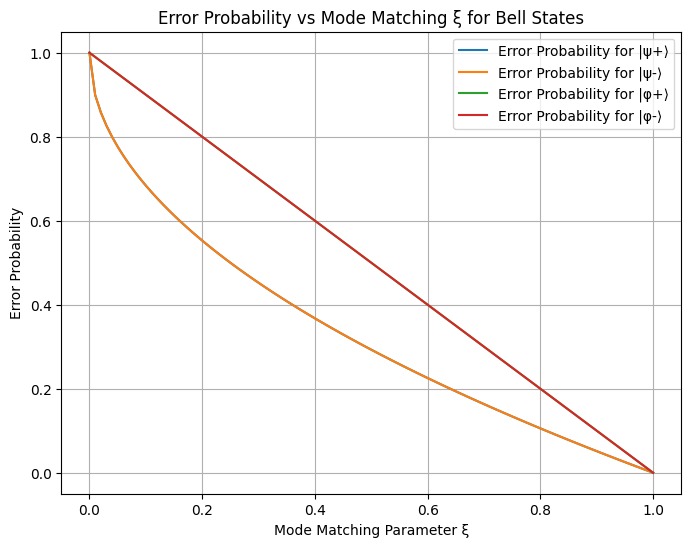

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
# Mode matching parameter ξ ranging from 0 (no match) to 1 (perfect match)
xi_values = np.linspace(0, 1, 100)

# Error probability for Bell states as a function of mode matching
def error_probability_mode_match(xi, bell_state):
    """
    Compute the error probability for mode matching ξ.
    The Bell states behave differently:
    |ψ±⟩ and |φ±⟩ have linear dependencies.
    """
    if bell_state in ["|ψ+⟩", "|ψ-⟩"]:
        return 1 - np.sqrt(xi)
    elif bell_state in ["|φ+⟩", "|φ-⟩"]:
        return 1 - xi
    else:
        return 0.0

# Generate error probabilities for all Bell states
error_probabilities = {
    state: [error_probability_mode_match(xi, state) for xi in xi_values]
    for state in ["|ψ+⟩", "|ψ-⟩", "|φ+⟩", "|φ-⟩"]
}

# Plotting Figure 4
plt.figure(figsize=(8, 6))
for state, errors in error_probabilities.items():
    plt.plot(xi_values, errors, label=f"Error Probability for {state}")

plt.xlabel("Mode Matching Parameter ξ")
plt.ylabel("Error Probability")
plt.title("Error Probability vs Mode Matching ξ for Bell States")
plt.legend()
plt.grid(True)
plt.show()

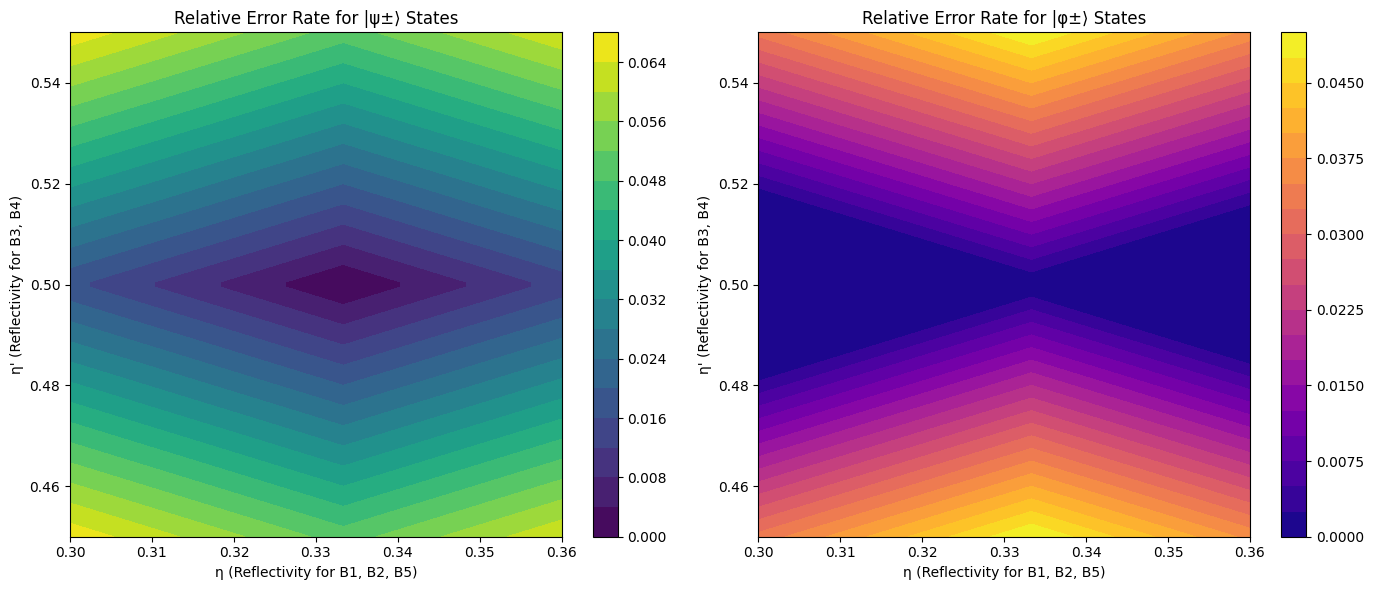

In [8]:
# Define a grid of η (1/3 nominal) and η' (1/2 nominal) values with small deviations
eta_range = np.linspace(0.3, 0.36, 100)  # η around 1/3
eta_prime_range = np.linspace(0.45, 0.55, 100)  # η' around 1/2

# Meshgrid for contour plot
eta, eta_prime = np.meshgrid(eta_range, eta_prime_range)

# Relative error rate calculations
def relative_error_psi(eta, eta_prime):
    """Relative error rate for |ψ±⟩ states."""
    return np.abs(eta_prime - 0.5) + 0.5 * np.abs(eta - 1/3)

def relative_error_phi(eta, eta_prime):
    """Relative error rate for |φ±⟩ states."""
    error = np.abs(eta_prime - 0.5) - 0.5 * np.abs(eta - 1/3)
    return np.maximum(error, 0)  # Clip negative values to zero

# Calculate error rates
error_psi = relative_error_psi(eta, eta_prime)
error_phi = relative_error_phi(eta, eta_prime)

# Plotting Figure 2 as contour plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# |ψ±⟩ Error Plot
contour1 = ax[0].contourf(eta, eta_prime, error_psi, cmap="viridis", levels=20)
fig.colorbar(contour1, ax=ax[0])
ax[0].set_title("Relative Error Rate for |ψ±⟩ States")
ax[0].set_xlabel("η (Reflectivity for B1, B2, B5)")
ax[0].set_ylabel("η' (Reflectivity for B3, B4)")

# |φ±⟩ Error Plot
contour2 = ax[1].contourf(eta, eta_prime, error_phi, cmap="plasma", levels=20)
fig.colorbar(contour2, ax=ax[1])
ax[1].set_title("Relative Error Rate for |φ±⟩ States")
ax[1].set_xlabel("η (Reflectivity for B1, B2, B5)")
ax[1].set_ylabel("η' (Reflectivity for B3, B4)")

plt.tight_layout()
plt.show()

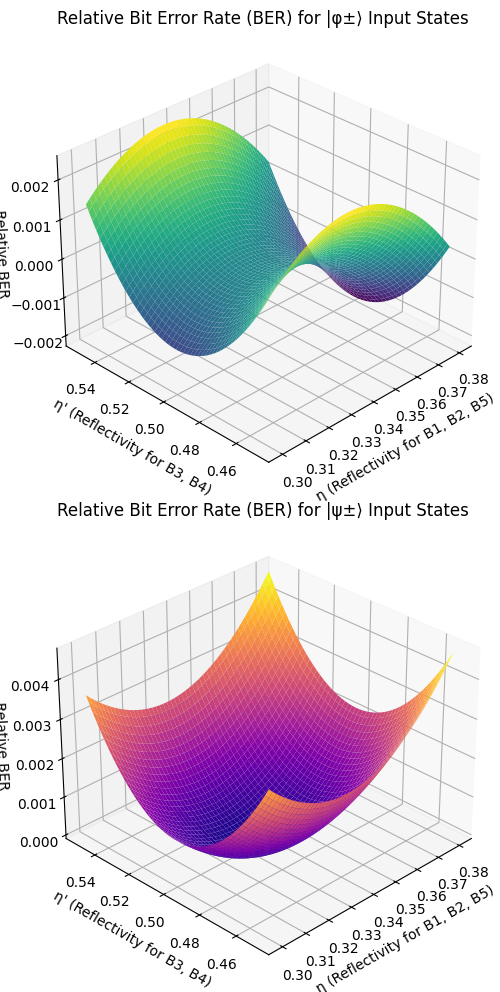

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting

# Define ranges for η (nominal 1/3) and η' (nominal 1/2)
# eta_range = np.linspace(0.38, 0.45, 200)      # Reflectivity η for B1, B2, B5
# eta_prime_range = np.linspace(0.45, 0.55, 200)  # Reflectivity η' for B3, B4
# Define ranges for η (1/3 nominal) and η' (1/2 nominal)
eta_range = np.linspace(0.3, 0.38, 200)      # Reflectivity η for B1, B2, B5
eta_prime_range = np.linspace(0.45, 0.55, 200)  # Reflectivity η' for B3, B4
# Meshgrid for 3D surface plot
eta, eta_prime = np.meshgrid(eta_range, eta_prime_range)

# Calculate error rates for |ψ±⟩ and |φ±⟩ states
error_psi = relative_error_psi(eta, eta_prime)
error_phi = relative_error_phi(eta, eta_prime)

# Plotting 3D Surface for |φ±⟩
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(211, projection='3d')
ax1.plot_surface(eta,eta_prime, error_phi, cmap="viridis", edgecolor='none')
ax1.set_title("Relative Bit Error Rate (BER) for |φ±⟩ Input States")
ax1.set_ylabel("η' (Reflectivity for B3, B4)")
ax1.set_xlabel("η (Reflectivity for B1, B2, B5)")
ax1.set_zlabel("Relative BER")
ax1.view_init(elev=30, azim=-135)  # Adjust viewing angle for better comparison

# Plotting 3D Surface for |ψ±⟩
ax2 = fig.add_subplot(212, projection='3d')
ax2.plot_surface(eta,eta_prime, error_psi, cmap="plasma", edgecolor='none')
ax2.set_title("Relative Bit Error Rate (BER) for |ψ±⟩ Input States")
ax2.set_ylabel("η' (Reflectivity for B3, B4)")
ax2.set_xlabel("η (Reflectivity for B1, B2, B5)")
ax2.set_zlabel("Relative BER")
ax2.view_init(elev=30, azim=-135)  # Adjust viewing angle for better comparison

plt.tight_layout()
plt.show()

NameError: name 'xi' is not defined

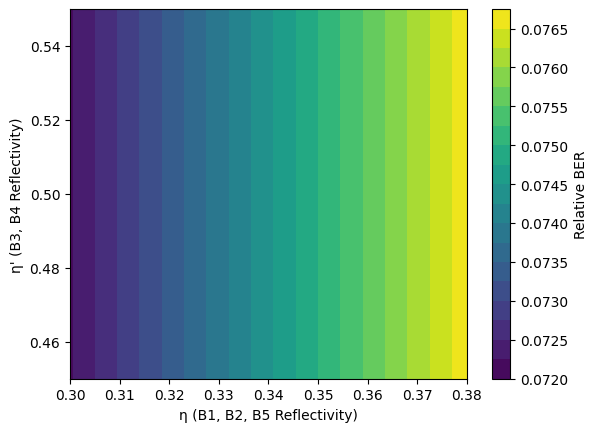

In [15]:
def relative_error_psi(eta, eta_prime):
    return (1 / 18) * (1 + np.sqrt(eta_prime))

def relative_error_phi(eta, eta_prime):
    return (1 / 18) * (1 + eta)


# Calculate error rates for |ψ±⟩ and |φ±⟩ states
error_psi = relative_error_psi(eta, eta_prime)
error_phi = relative_error_phi(eta, eta_prime)


plt.contourf(eta_range, eta_prime_range, error_phi, levels=20, cmap="viridis")
plt.colorbar(label="Relative BER")
plt.xlabel("η (B1, B2, B5 Reflectivity)")
plt.ylabel("η' (B3, B4 Reflectivity)")

input_states = ["|HcHt>", "|HcVt>", "|VcHt>", "|VcVt>"]
expected_outputs = {
    "|HcHt>": {"cH_tH": 1/9, "others": 0},
    "|VcVt>": {"cV_tH": 1/9, "others": 0.5 * (1 - xi) / 9},
    # Add remaining states here
}
# Validate counts match expected outcomes

In [ ]:
import strawberryfields as sf
from strawberryfields.ops import Sgate, BSgate, MeasureFock
import numpy as np
import matplotlib.pyplot as plt

# Define the range of η and η' values
eta_values = np.linspace(0.3, 0.36, 200)      # Reflectivity η (B1, B2, B5)
eta_prime_values = np.linspace(0.45, 0.55, 200)  # Reflectivity η' (B3, B4)
eta, eta_prime = np.meshgrid(eta_values, eta_prime_values)

# Function to calculate BER for |ψ+⟩ state
def calculate_ber(eta, eta_prime):
    # Create a new program for each iteration
    prog = sf.Program(4)

    with prog.context as q:
        # Dual-rail encoding (initial squeezing for all modes)
        Sgate(1.0) | q[0]
        Sgate(1.0) | q[1]
        Sgate(1.0) | q[2]
        Sgate(1.0) | q[3]

        # Apply beam splitters with reflectivities η and η'
        BSgate(eta, 0.0) | (q[0], q[1])  # B1, B2
        BSgate(eta_prime, 0.0) | (q[2], q[3])  # B3, B4

        # Measure in the Fock basis
        MeasureFock() | q

    # Run simulation
    eng = sf.Engine("fock", backend_options={"cutoff_dim": 5})
    results = eng.run(prog)
    samples = results.samples

    # Simplified BER calculation as a proxy
    ber = np.mean(samples)  # Use sample statistics as a placeholder for actual BER
    return ber

# Calculate BER for the grid of (eta, eta_prime)
ber_values = np.array([
    [calculate_ber(e, ep) for e, ep in zip(row_eta, row_eta_prime)]
    for row_eta, row_eta_prime in zip(eta, eta_prime)
])

# Plot 3D surface for Relative BER
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(eta, eta_prime, ber_values, cmap="viridis", edgecolor="k")
ax.set_xlabel("η (B1, B2, B5 Reflectivity)")
ax.set_ylabel("η' (B3, B4 Reflectivity)")
ax.set_zlabel("Relative BER")
ax.set_title("Relative BER Surface Plot (Figure 2)")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

In [ ]:
from scipy.special import erf

# Define Timing Synchronization Efficiency
def timing_synchronization_efficiency(sigma_synch, sigma_pulse):
    return (1 - 0.5 * erf(sigma_synch / (np.sqrt(2) * sigma_pulse))) + \
           0.5 * erf(-sigma_synch / (np.sqrt(2) * sigma_pulse))

# Simulation Parameters
sigma_pulse_values = [10e-12, 1e-12, 500e-15, 100e-15, 20e-15]
sigma_synch_values = np.logspace(-15, -8, 100)

# Plot Timing Synchronization Efficiency
plt.figure(figsize=(10, 6))
for sigma_pulse in sigma_pulse_values:
    efficiency = [timing_synchronization_efficiency(sigma_synch, sigma_pulse) for sigma_synch in sigma_synch_values]
    plt.plot(sigma_synch_values, efficiency, label=f"σ_pulse = {sigma_pulse:.0e} s")

plt.xscale("log")
plt.xlabel("Synchronization Error σ_synch [s]")
plt.ylabel("Efficiency η")
plt.title("Timing Synchronization Efficiency (Figure 4)")
plt.legend()
plt.grid()
plt.show()

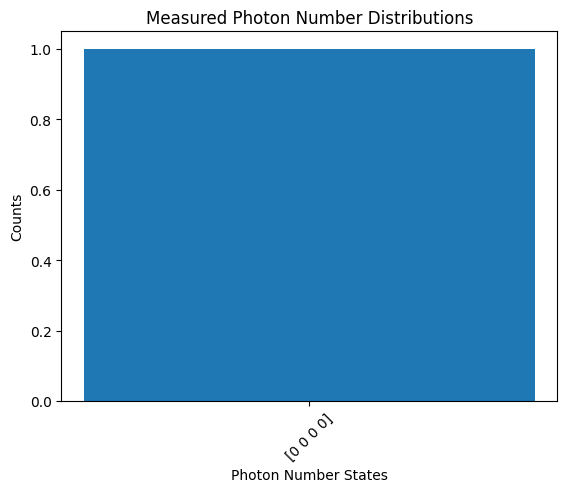

In [19]:
import strawberryfields as sf
from strawberryfields.ops import Sgate, BSgate, MeasureFock
import matplotlib.pyplot as plt
import numpy as np

# Initialize a program with 4 modes (2 for control, 2 for target)
prog = sf.Program(4)

# Nominal reflectivities for the beam splitters
eta = 1 / 3  # Reflectivity for B1, B2, B5
eta_prime = 1 / 2  # Reflectivity for B3, B4

with prog.context as q:
    # Apply squeezing gates for dual-rail encoding (logical |H⟩ and |V⟩)
    Sgate(1.0) | q[0]
    Sgate(1.0) | q[1]
    Sgate(1.0) | q[2]
    Sgate(1.0) | q[3]
    
    # Beam splitters to create the CNOT operation
    BSgate(eta, 0.0) | (q[0], q[1])  # B1, B2
    BSgate(eta_prime, 0.0) | (q[2], q[3])  # B3, B4
    
    # Apply measurement in the Fock basis
    MeasureFock() | q

# Run the program on the Fock backend
eng = sf.Engine("fock", backend_options={"cutoff_dim": 5})
results = eng.run(prog)

# Extract and analyze measurement results
samples = results.samples
unique, counts = np.unique(samples, axis=0, return_counts=True)

# Visualize photon distributions
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(counts)), unique, rotation=45)
plt.xlabel("Photon Number States")
plt.ylabel("Counts")
plt.title("Measured Photon Number Distributions")
plt.show()